In [1]:
path = r'C:/Users/ruw/Desktop'
import sys # https://stackoverflow.com/questions/4383571/importing-files-from-different-folder
sys.path.insert(1, rf'{path}\RA\penicilin\Libaries')

In [2]:
import reload_lib as rl
import life_cycle_assessment as lc
import lcia_results as lr
import standards as s
import database_manipulation as dm
import results_figures as rfig
import sensitivity as st
import lca
lib = [rl, lc, lr, dm, s, rfig, lca, st]

rl.reload_lib(lib)

In [3]:
from lca import LCA


In [4]:
matching_database = "ev391cutoff"
lcia_method='recipe'
bw_project="Penicillin"
database = "penicillin_cut_off"

In [5]:
set_up = LCA(path, matching_database, database)

In [6]:
meth = set_up.lcia_impact_method()
meth[-3:]

l = [
    "Ecosystem damage",
    "Human health damage",
    "Natural resources damage"
]

Extracted 1 worksheets in 0.05 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 3.30 seconds
Matching database: ev391cutoff
Applying strategy: link_iterable_by_fields


Writing activities to SQLite3 database:


18 datasets
169 exchanges
0 unlinked exchanges
  
Wrote matching file to:
C:\Users\ruw\AppData\Local\pylca\Brightway3\Penicillin.7179b081106185b3e43fbe3ebfd7f229\output\db-matching-penicillin_cut_off-unlinked.xlsx


0% [##################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 04/11/2025 09:32:45
  Finished: 04/11/2025 09:32:45
  Total time elapsed: 00:00:00
  CPU %: 97.70
  Memory %: 2.33
Created database: penicillin_cut_off
Initialization is completed for penicillin_cut_off
Total amount of calculations: 252


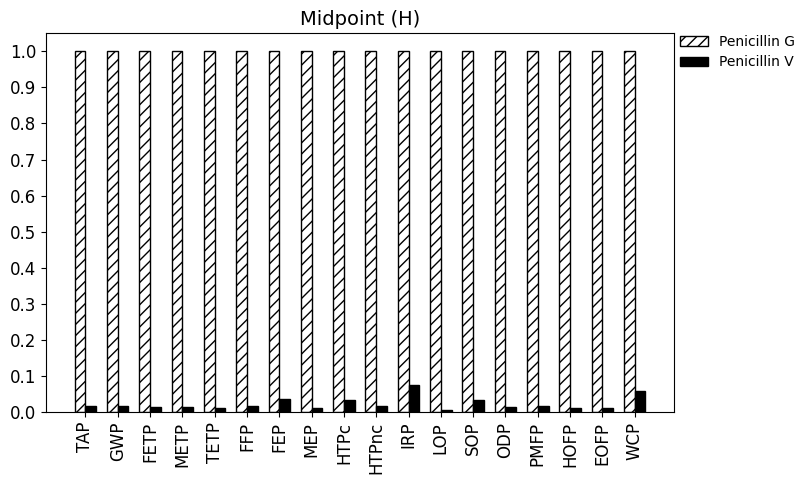

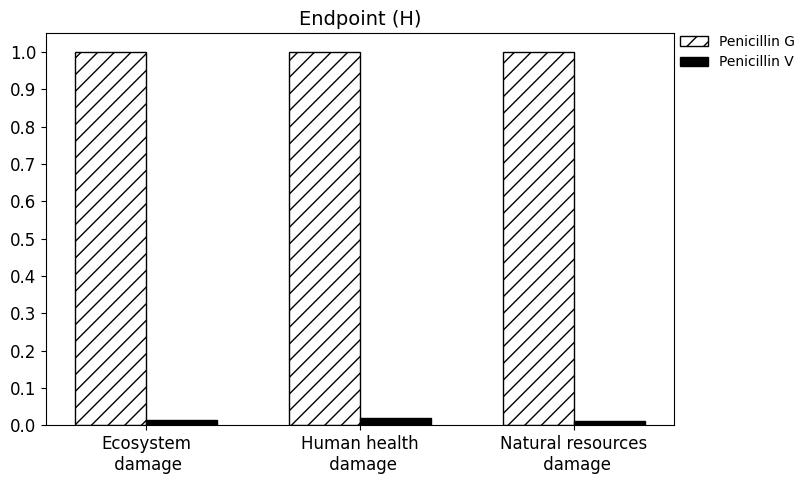

Performing LCIA for manufacturing of raw penicillium G
Performing LCIA for manufacturing of raw penicillium V


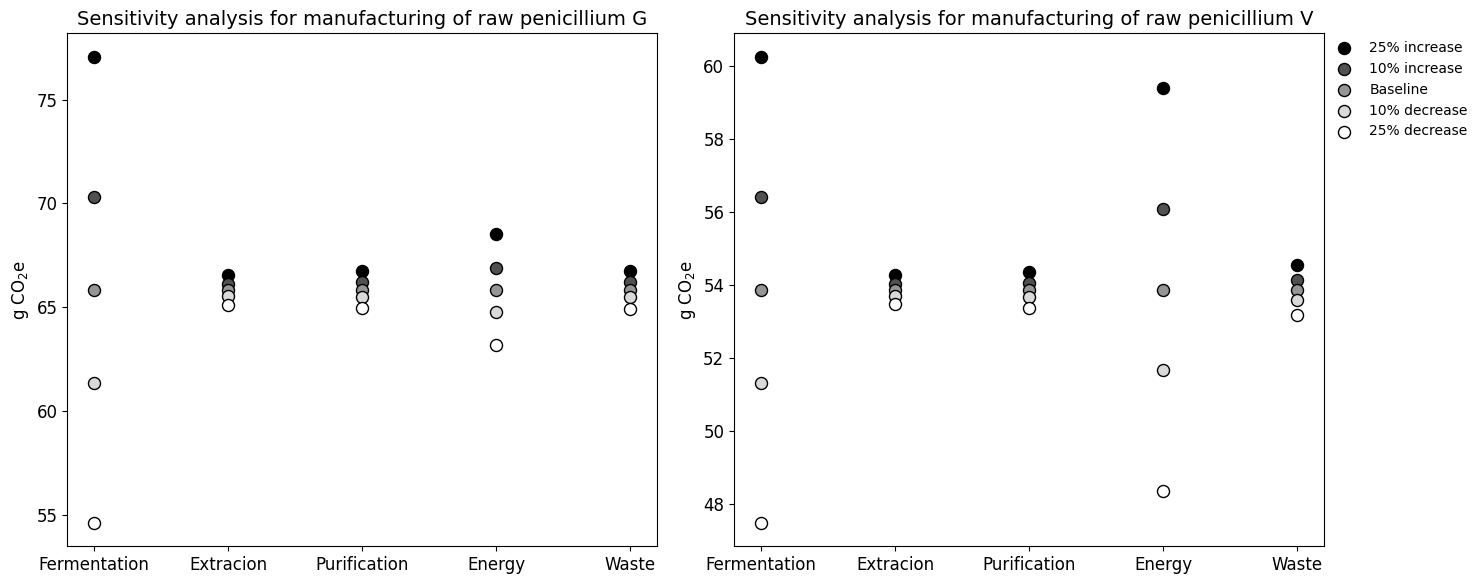

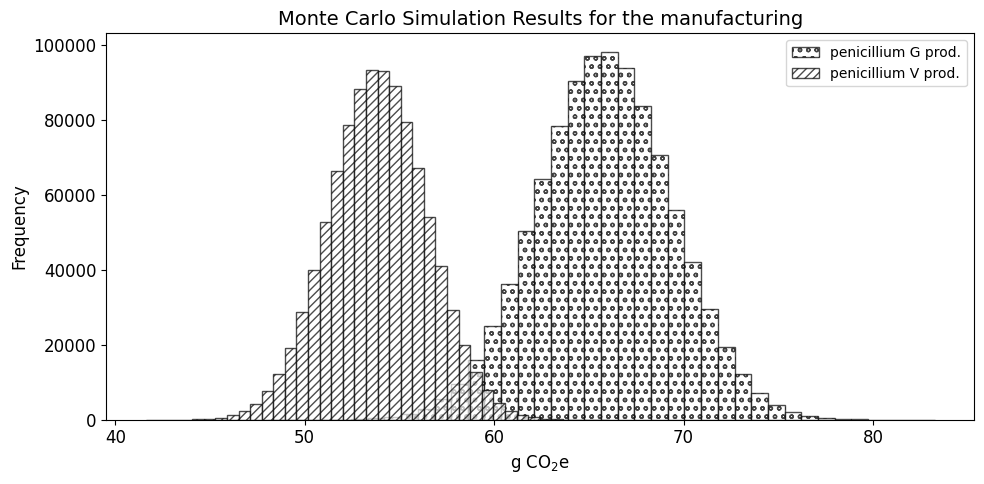

T-statistic: 2725.178395056478, P-value: 0.0


In [11]:
rl.reload_lib(lib)

data = rfig.create_results_figures(path, matching_database, database, lcia_method, bw_project) # Calculating the results and creating the figures
st.perform_sens_uncert_analysis(set_up.system_path, set_up.db, mc_base=10, mc_power=6, calc=True)

In [8]:
def save_total_impact():
    path_pen = r"C:\Users\ruw\Desktop\RA\penicilin\results\LCIA\LCIA_results.xlsx"
    method = set_up.lcia_impact_method()
    df = s.import_LCIA_results(path_pen, method)
    
    df_tot, _ = lc.dataframe_element_scaling(df)
    df_tot_T = df_tot.T

    method_updated = []

    for m in method:
        method_updated.append(m[1:])

    df_tot_T.index = method_updated
    df_tot_T
    file_path_tot = r"C:\Users\ruw\Desktop\RA\penicilin\results\LCIA\penincillium_totals.xlsx"
    s.save_LCIA_results(df_tot_T, file_path_tot, "totals")

In [9]:
# save_total_impact()